In [55]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
dfs = []

sec_id = "tcsg"
date_from = "2020-01-01"
date_to = "2025-02-26"
url = f"https://iss.moex.com/iss/history/engines/stock/markets/shares/boards/tqbr/securities/{sec_id}/candles.html?from={date_from}&till={date_to}"

retrieved = 0
while True:
    df, cursor = pd.read_html(url + f"&start={retrieved}")
    dfs.append(df)
    retrieved += cursor.at[0, "PAGESIZE (int64)"]
    total = cursor.at[0, "TOTAL (int64)"]
    if retrieved >= total:
        break

df = pd.concat(dfs, axis=0, ignore_index=True)
df

,BOARDID (string:12),TRADEDATE (date:10),SHORTNAME (string:189),SECID (string:36),NUMTRADES (double),VALUE (double),OPEN (double),LOW (double),HIGH (double),LEGALCLOSEPRICE (double),...,MARKETPRICE2 (double),MARKETPRICE3 (double),ADMITTEDQUOTE (double),MP2VALTRD (double),MARKETPRICE3TRADESVALUE (double),ADMITTEDVALUE (double),WAVAL (double),TRADINGSESSION (int32),CURRENCYID (string:9),TRENDCLSPR (double)
0,TQBR,2020-01-03,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,3586,1.156614e+08,1317.2,1317.2,1353.0,1332.4,...,1344.4,1344.4,1332.4,1.156614e+08,1.156614e+08,115661375.8,NaN,3,SUR,1.62
1,TQBR,2020-01-06,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2497,7.186416e+07,1340.0,1312.0,1349.4,1322.8,...,1321.2,1321.2,1322.8,7.186416e+07,7.186416e+07,71864157.0,NaN,3,SUR,-0.72
2,TQBR,2020-01-08,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2191,9.221384e+07,1315.2,1312.4,1350.2,1350.2,...,1334.2,1334.2,1350.2,9.221384e+07,9.221384e+07,92213837.2,NaN,3,SUR,2.07
3,TQBR,2020-01-09,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2898,8.827762e+07,1350.2,1333.8,1368.0,1366.8,...,1357.6,1357.6,1366.8,8.827762e+07,8.827762e+07,88277620.0,NaN,3,SUR,1.23
4,TQBR,2020-01-10,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,4188,1.012924e+08,1355.2,1355.0,1401.0,1398.4,...,1381.0,1381.0,1398.4,1.012924e+08,1.012924e+08,101292419.2,NaN,3,SUR,2.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,TQBR,2024-11-21,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,237731,2.690711e+10,2550.4,2473.2,2579.0,2526.0,...,2531.8,2531.8,NaN,1.957784e+10,1.957784e+10,NaN,0.0,3,SUR,1.43
1239,TQBR,2024-11-22,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,275872,3.075939e+10,2582.0,2412.2,2588.4,2460.0,...,2516.6,2516.6,NaN,2.402745e+10,2.402745e+10,NaN,0.0,3,SUR,-5.11
1240,TQBR,2024-11-25,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,197053,1.842363e+10,2386.4,2326.0,2394.8,2349.8,...,2365.0,2365.0,NaN,1.578266e+10,1.578266e+10,NaN,0.0,3,SUR,-4.30
1241,TQBR,2024-11-26,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,246040,2.420172e+10,2340.2,2251.2,2375.4,2272.8,...,2322.8,2322.8,NaN,2.093006e+10,2.093006e+10,NaN,0.0,3,SUR,-2.80


В таблице, спарсенной с сайта Мосбиржи, содержится информация о торгах акций Т-Банка (в прошлом Тинькофф) на каждый день с 1 января 2020 года по 26 февраля 2025 года, за исключением выходных и праздничных дней.

Что содержится в каждой из колонок таблицы?

0 колонка - индекс

1 колонка (BOARDID) - идентификатор рынка. У нас это TQBR - основноый рынок акций на Мосбирже.

2 колонка (TRADEDATE) - дата торгов.

3 колонка (SHORTNAME) - имя компании (ТКСХолд ао - это ТКС Холдинг, группа, владеющая Т-Банком)

4 колонка (SECID) - тикер Т-Банка (TCSG)

5 колонка (NUMTRADES) - количество сделок за день

6 колонка (VALUE) - денежный объем торгов (цена*количество; суммарная стоимость всех сделок с ценной бумагой за день)

7 колонка (OPEN) - цена открытия

8 колонка (LOW) - минимальная цена

9 колонка (HIGH) - максимальная цена

10 колонка (LEGALCLOSEPRICE) - официальная цена закрытия

11 колонка (WAPRICE) - средневзвешенная цена

12 колонка (CLOSE) - фактическая цена закрытия

13 колонка (VOLUME) - количество акций, проданных или купленных за день

14 колонка (MARKETPRICE2) - рыночная цена 2

15 колонка (MARKETPRICE3) - рыночная цена 3

16 колонка (ADMITTEDQUOTE) - признаваемая котировка

17 колонка (MP2VALTRD) - объём сделок для расчёта рыночной цены

18 колонка (MARKETPRICE3TRADESVALUE) - значение рыночной цены 3 по итогам торгового дня

19 колонка (ADMITTEDVALUE) -  объём сделок для расчёта признаваемой котировки

20 колонка (WAVAL) - средневзвешенная стоимость актива, рассчитанная на основе объема торгов

21 колонка (TRADINGSESSION) - идентификатор торговой сессии

22 колонка (CURRENCYID) - индкентификатор валюты - рубль.

23 колонка (TRENDCLSPR) - индикатор тренда, разница между текущей ценой закрытия и предыдущей ценой закрытия, выраженная в процентах

In [57]:
nulls = df.isnull().sum(axis = 0)
print(nulls)

a = df['TRADEDATE (date:10)'][(df['OPEN (double)'].isnull() == True) | (df['LOW (double)'].isnull() == True) | (df['HIGH (double)'].isnull() == True) | (df['WAPRICE (double)'].isnull() == True) | (df['CLOSE (double)'].isnull() == True) | (df['TRENDCLSPR (double)'].isnull() == True)]
an = a.to_numpy()

b = df['TRADEDATE (date:10)'][(df['ADMITTEDQUOTE (double)'].isnull() == True) | (df['ADMITTEDVALUE (double)'].isnull() == True)]
bn = b.to_numpy()

c = df['TRADEDATE (date:10)'][df['MARKETPRICE2 (double)'].isnull() == True]
cn = c.to_numpy()

d = df['TRADEDATE (date:10)'][df['WAVAL (double)'].isnull() == True]
dn = d.to_numpy()


BOARDID (string:12)                   0
TRADEDATE (date:10)                   0
SHORTNAME (string:189)                0
SECID (string:36)                     0
NUMTRADES (double)                    0
VALUE (double)                        0
OPEN (double)                        40
LOW (double)                         40
HIGH (double)                        40
LEGALCLOSEPRICE (double)              0
WAPRICE (double)                     40
CLOSE (double)                       40
VOLUME (double)                       0
MARKETPRICE2 (double)                20
MARKETPRICE3 (double)                 0
ADMITTEDQUOTE (double)              477
MP2VALTRD (double)                    0
MARKETPRICE3TRADESVALUE (double)      0
ADMITTEDVALUE (double)              477
WAVAL (double)                      115
TRADINGSESSION (int32)                0
CURRENCYID (string:9)                 0
TRENDCLSPR (double)                  40
dtype: int64


In [67]:
cond = df['TRADEDATE (date:10)'].isin(a)
df['Были ли торги'] = np.where(cond, 'нет', 'да')
df['Разброс цен'] = df['HIGH (double)'] - df['LOW (double)']
df['Категория по средневзвешенной цене'] = pd.qcut(df['WAPRICE (double)'], q = 3, labels = ['low', 'medium', 'high'])
df['Прирост количества торгуемых акций'] = df['VOLUME (double)'].diff() / df['VOLUME (double)'].shift()
df['Доходность по средневзвешенной цене'] = df['WAPRICE (double)'].diff() / df['WAPRICE (double)'].shift()
df['Прирост количества сделок'] = df['NUMTRADES (double)'].diff() / df['NUMTRADES (double)'].shift()
df

,BOARDID (string:12),TRADEDATE (date:10),SHORTNAME (string:189),SECID (string:36),NUMTRADES (double),VALUE (double),OPEN (double),LOW (double),HIGH (double),LEGALCLOSEPRICE (double),...,WAVAL (double),TRADINGSESSION (int32),CURRENCYID (string:9),TRENDCLSPR (double),Были ли торги,Разброс цен,Категория по средневзвешенной цене,Прирост количества торгуемых акций,Доходность по средневзвешенной цене,Прирост количества сделок
0,TQBR,2020-01-03,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,3586,1.156614e+08,1317.2,1317.2,1353.0,1332.4,...,NaN,3,SUR,1.62,да,35.8,low,NaN,NaN,NaN
1,TQBR,2020-01-06,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2497,7.186416e+07,1340.0,1312.0,1349.4,1322.8,...,NaN,3,SUR,-0.72,да,37.4,low,-0.367784,-0.017257,-0.303681
2,TQBR,2020-01-08,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2191,9.221384e+07,1315.2,1312.4,1350.2,1350.2,...,NaN,3,SUR,2.07,да,37.8,low,0.270563,0.009991,-0.122547
3,TQBR,2020-01-09,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,2898,8.827762e+07,1350.2,1333.8,1368.0,1366.8,...,NaN,3,SUR,1.23,да,34.2,low,-0.059093,0.017386,0.322684
4,TQBR,2020-01-10,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,4188,1.012924e+08,1355.2,1355.0,1401.0,1398.4,...,NaN,3,SUR,2.31,да,46.0,low,0.127916,0.017236,0.445135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,TQBR,2024-11-21,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,237731,2.690711e+10,2550.4,2473.2,2579.0,2526.0,...,0.0,3,SUR,1.43,да,105.8,medium,0.065820,-0.021018,-0.041655
1239,TQBR,2024-11-22,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,275872,3.075939e+10,2582.0,2412.2,2588.4,2460.0,...,0.0,3,SUR,-5.11,да,176.2,low,0.156629,-0.011287,0.160438
1240,TQBR,2024-11-25,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,197053,1.842363e+10,2386.4,2326.0,2394.8,2349.8,...,0.0,3,SUR,-4.30,да,68.8,low,-0.364628,-0.057560,-0.285709
1241,TQBR,2024-11-26,Ð¢ÐÐ¡Ð¥Ð¾Ð»Ð´ Ð°Ð¾,TCSG,246040,2.420172e+10,2340.2,2251.2,2375.4,2272.8,...,0.0,3,SUR,-2.80,да,124.2,low,0.339609,-0.019314,0.248598


In [59]:

nk = df.drop(columns = ['BOARDID (string:12)', 'TRADEDATE (date:10)', 'SHORTNAME (string:189)', 'SECID (string:36)', 'WAVAL (double)', 'TRADINGSESSION (int32)', 'CURRENCYID (string:9)', 'Были ли торги', 'Категория по средневзвешенной цене']).columns
stat = dict()
stat['Показатель'] = ['среднее', 'медиана', '25% квантиль', '50% квантиль', '75% квантиль', 'минимум', 'максимум', 'ст. откл.']
for el in nk:
    stat[el] = [df[el].mean(), df[el].median(), df[el].quantile(q = 0.25), df[el].quantile(q = 0.5), df[el].quantile(q = 0.75), df[el].min(), df[el].max(), df[el].std()]
framestat = pd.DataFrame(stat)
framestat

c:\Users\Huaweii\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Huaweii\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Показатель,NUMTRADES (double),VALUE (double),OPEN (double),LOW (double),HIGH (double),LEGALCLOSEPRICE (double),WAPRICE (double),CLOSE (double),VOLUME (double),...,MARKETPRICE3 (double),ADMITTEDQUOTE (double),MP2VALTRD (double),MARKETPRICE3TRADESVALUE (double),ADMITTEDVALUE (double),TRENDCLSPR (double),Разброс цен,Прирост количества торгуемых акций,Доходность по средневзвешенной цене,Прирост количества сделок
0,среднее,32487.248592,2.231560e+09,3237.280964,3159.311388,3303.076891,3230.273934,3231.604904,3232.775894,7.331359e+05,...,3233.956959,3385.343473,2.077897e+09,1.956024e+09,1.454002e+09,0.105952,143.765503,inf,0.001276,inf
1,медиана,23037.000000,1.073302e+09,2760.000000,2705.500000,2809.000000,2807.000000,2751.000000,2752.500000,3.350860e+05,...,2810.000000,2602.000000,1.016899e+09,9.573895e+08,7.571495e+08,0.030000,96.600000,-0.029069,0.000214,-0.019903
2,25% квантиль,13792.000000,4.774542e+08,2299.250000,2239.700000,2357.100000,2323.000000,2303.000000,2299.900000,2.021875e+05,...,2325.850000,1869.700000,4.694978e+08,4.391516e+08,4.005150e+08,-1.345000,60.500000,-0.284210,-0.012833,-0.253418
3,50% квантиль,23037.000000,1.073302e+09,2760.000000,2705.500000,2809.000000,2807.000000,2751.000000,2752.500000,3.350860e+05,...,2810.000000,2602.000000,1.016899e+09,9.573895e+08,7.571495e+08,0.030000,96.600000,-0.029069,0.000214,-0.019903
4,75% квантиль,38254.500000,2.413657e+09,3530.000000,3462.500000,3575.000000,3500.000000,3516.250000,3519.500000,6.332875e+05,...,3503.000000,4768.950000,2.227057e+09,2.158721e+09,1.685654e+09,1.645000,176.000000,0.396231,0.015119,0.326630
5,минимум,0.000000,0.000000e+00,836.200000,810.000000,860.600000,831.800000,839.000000,831.800000,0.000000e+00,...,838.800000,831.800000,0.000000e+00,5.032000e+05,0.000000e+00,-32.280000,12.000000,-1.000000,-0.161542,-1.000000
6,максимум,440874.000000,4.904654e+10,8400.000000,8005.000000,8518.400000,8360.600000,8342.600000,8345.000000,1.616927e+07,...,8342.800000,8360.600000,4.735647e+10,4.735647e+10,2.963233e+10,21.560000,2327.000000,inf,0.192976,inf
7,ст. откл.,36840.527777,3.953252e+09,1614.331251,1574.275082,1647.459754,1585.359097,1608.520209,1610.312410,1.440505e+06,...,1585.071697,1982.467751,3.582310e+09,3.407608e+09,2.251166e+09,3.309445,143.522251,NaN,0.028605,NaN


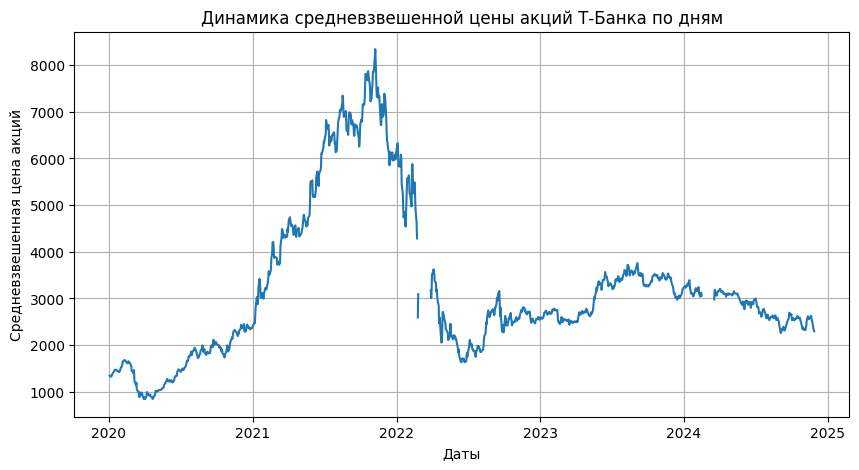

In [60]:
plt.figure(figsize = (10, 5))
q = pd.to_datetime(df['TRADEDATE (date:10)'])
plt.plot(q, df['WAPRICE (double)'])
plt.grid()
plt.title('Динамика средневзвешенной цены акций Т-Банка по дням')
plt.xlabel('Даты')
plt.ylabel('Средневзвешенная цена акций')
plt.show()



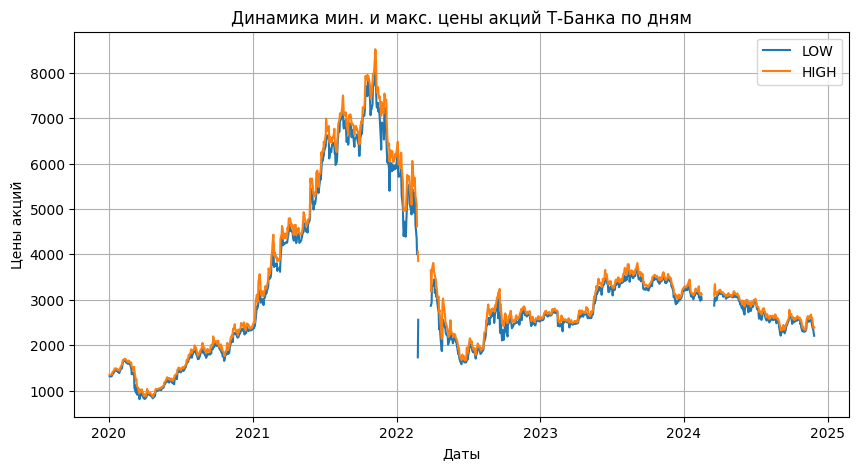

In [61]:
plt.figure(figsize = (10, 5))
plt.plot(q, df['LOW (double)'], label = 'LOW')
plt.plot(q, df['HIGH (double)'], label = 'HIGH' )
plt.grid()
plt.legend()
plt.title('Динамика мин. и макс. цены акций Т-Банка по дням')
plt.xlabel('Даты')
plt.ylabel('Цены акций')
plt.show()


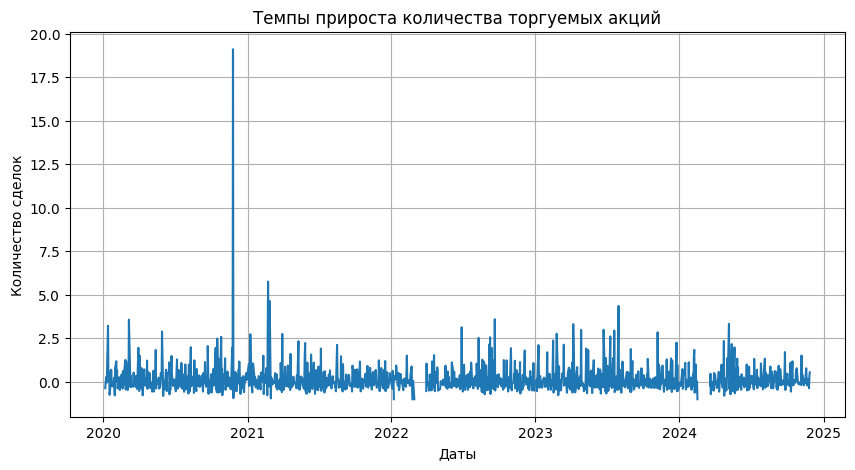

In [62]:
plt.figure(figsize = (10, 5))
plt.plot(q, df['Прирост количества торгуемых акций'])
plt.grid()
plt.title('Темпы прироста количества торгуемых акций')
plt.xlabel('Даты')
plt.ylabel('Количество сделок')
plt.show()


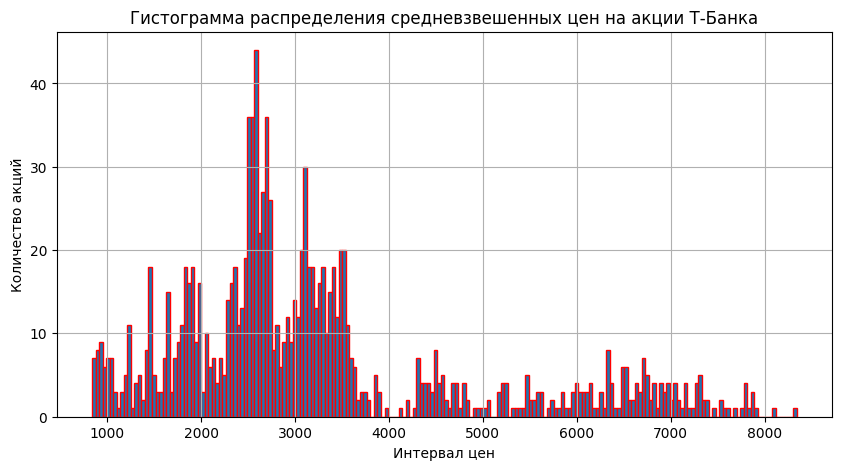

In [63]:
plt.figure(figsize = (10, 5))
plt.hist(df['WAPRICE (double)'], bins = 200, edgecolor = 'red')
plt.grid()
plt.title('Гистограмма распределения средневзвешенных цен на акции Т-Банка')
plt.xlabel('Интервал цен')
plt.ylabel('Количество акций')
plt.show()


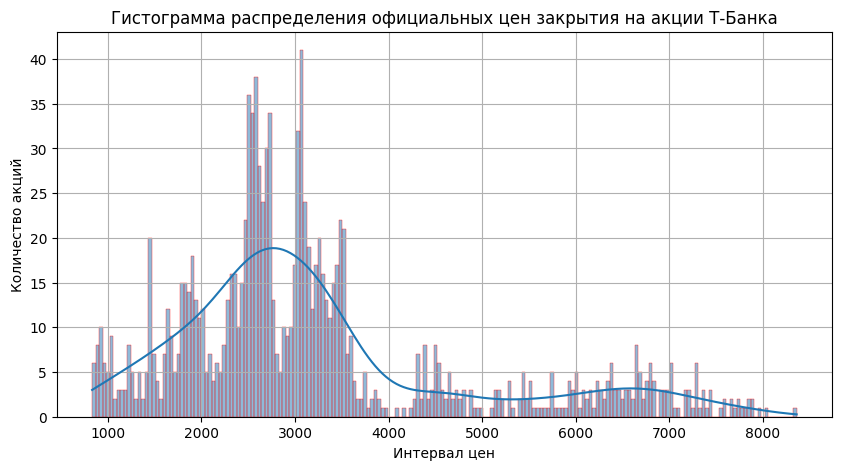

In [64]:
plt.figure(figsize = (10, 5))
sns.histplot(df['LEGALCLOSEPRICE (double)'], bins = 200, edgecolor = 'red', kde = True)
plt.grid()
plt.title('Гистограмма распределения официальных цен закрытия на акции Т-Банка')
plt.xlabel('Интервал цен')
plt.ylabel('Количество акций')
plt.show()


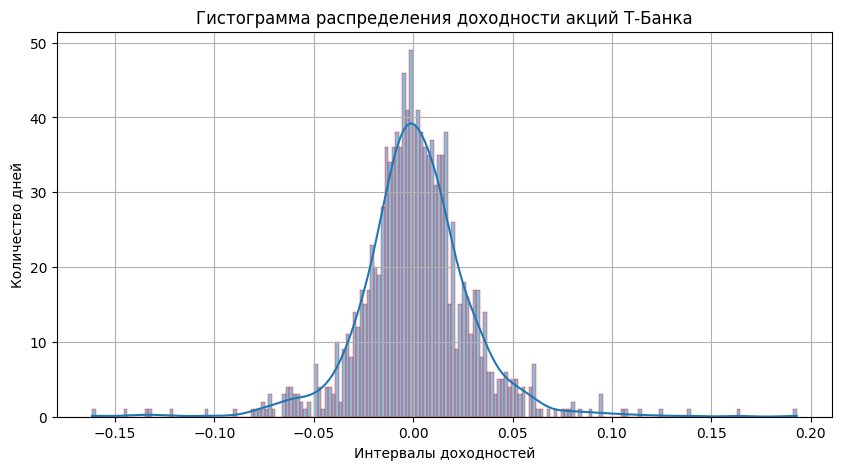

In [65]:
plt.figure(figsize = (10, 5))
sns.histplot(df['Доходность по средневзвешенной цене'], bins = 200, edgecolor = 'red', kde = True)
plt.grid()
plt.title('Гистограмма распределения доходности акций Т-Банка')
plt.xlabel('Интервалы доходностей')
plt.ylabel('Количество дней')
plt.show()

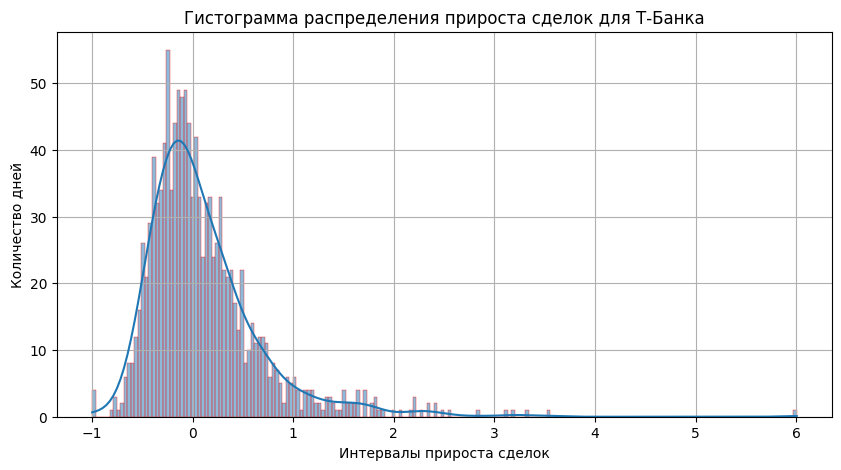

In [66]:


plt.figure(figsize = (10, 5))
sns.histplot(df['Прирост количества сделок'], bins = 200, edgecolor = 'red', kde = True)
plt.grid()
plt.title('Гистограмма распределения прироста сделок для Т-Банка')
plt.xlabel('Интервалы прироста сделок')
plt.ylabel('Количество дней')
plt.show()